In [ ]:
pip install pytrends simplified-scrapy  beautifulsoup4 ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=11bac3e6fc8d010d799a79d5a357be094cbd791156b27e3b47819f4661fc2e02
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [ ]:

#Extract Google Trends data
print("6. Extracting Google Trends data...This may take some time, please be patient !")
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
pytrend = TrendReq(hl='en-US')
keyword = 'Bitcoin'
geo=''
cat=0
#gprop=''
#Acquire daily google trend data for over 9 month by concatenating multiple queries, and normalize(scaling) by the overlapping period (overlapping method)
# overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=False)
# overlapping.plot(figsize=(15,10))

#Acquire daily google trend data for over 9 month by concatenating multiple non-overlapping queries of 1-month, and normalize(scaling) by weekly trend value of the same period
from pytrends import dailydata
import time
keyword = 'Bitcoin'
start = '2012-01-01'
end = date.today().strftime("%Y-%m-%d")
start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month
start_time = time.time()
df_google_trends_daily_data = dailydata.get_daily_data(word= keyword,start_year= s_year,start_mon= s_mon,stop_year= e_year,stop_mon= e_mon,geo= geo,verbose= True,wait_time = 1.0)
df_google_trends_daily_data=df_google_trends_daily_data.rename_axis(None, axis=1).rename_axis('Date', axis=0)
df_google_trends_daily_data= df_google_trends_daily_data.rename(columns={'Bitcoin': 'google_trends_index_BTC'})
df_google_trends_daily_data.tail(3)
#Select relevant columns and rename them for redability of dataframe
#Select relevant columns and rename them for redability of dataframe
#df_google_trends_daily_data= df_google_trends_daily_data.rename(columns={'Bitcoin': 'google_trends_index_BTC'})
end_time = time.time()
print("Time taken in seconds : ",end_time - start_time)
df_google_trends_daily_data = df_google_trends_daily_data.filter(['google_trends_index_BTC']) #Remove all other columns that are not required
print("Done!")

6. Extracting Google Trends data...This may take some time, please be patient !
Bitcoin:2012-01-01 2012-01-31
Bitcoin:2012-02-01 2012-02-29
Bitcoin:2012-03-01 2012-03-31
Bitcoin:2012-04-01 2012-04-30
Bitcoin:2012-05-01 2012-05-31
Bitcoin:2012-06-01 2012-06-30
Bitcoin:2012-07-01 2012-07-31
Bitcoin:2012-08-01 2012-08-31
Bitcoin:2012-09-01 2012-09-30
Bitcoin:2012-10-01 2012-10-31
Bitcoin:2012-11-01 2012-11-30
Bitcoin:2012-12-01 2012-12-31
Bitcoin:2013-01-01 2013-01-31
Bitcoin:2013-02-01 2013-02-28
Bitcoin:2013-03-01 2013-03-31
Bitcoin:2013-04-01 2013-04-30
Bitcoin:2013-05-01 2013-05-31
Bitcoin:2013-06-01 2013-06-30
Bitcoin:2013-07-01 2013-07-31
Bitcoin:2013-08-01 2013-08-31
Bitcoin:2013-09-01 2013-09-30
Bitcoin:2013-10-01 2013-10-31
Bitcoin:2013-11-01 2013-11-30
Bitcoin:2013-12-01 2013-12-31
Bitcoin:2014-01-01 2014-01-31
Bitcoin:2014-02-01 2014-02-28
Bitcoin:2014-03-01 2014-03-31
Bitcoin:2014-04-01 2014-04-30
Bitcoin:2014-05-01 2014-05-31
Bitcoin:2014-06-01 2014-06-30
Bitcoin:2014-07-01 2

In [ ]:
df_google_trends_daily_data.to_csv("google_trends.csv")
print("done!")

done!


In [ ]:

#Scrape Historical Bitcoin related Tweets from Bitinfocharts 
print("7. Scraping Bitcoin Historical tweets data...")
from Tweets import getTweets 
url = 'https://bitinfocharts.com/comparison/bitcoin-tweets.html'
df_tweet_data= getTweets(url)
df_tweet_data['Date'] = pd.to_datetime(df_tweet_data['Date']).dt.date
df_tweet_data.set_index("Date", inplace=True)
df_tweet_data.index = pd.to_datetime(df_tweet_data.index) #Convert index to datetime
dat3 = pd.DataFrame()
for col in df_tweet_data.columns:
    dat3[col] = pd.to_numeric(df_tweet_data['Tweets'], errors='coerce')
df_tweet_data= dat3
#df_tweet_data= df_tweet_data["Tweets"].replace(np.nan, "null")
df_tweet_data = df_tweet_data.fillna(method='ffill')
df_tweet_data = df_tweet_data.fillna(method='bfill')
#df_tweet_data= cubic_spline_interpolation(df_tweet_data) 
df_tweet_data = df_tweet_data.astype(float)
df_tweet_data.tail(3)
print("All historical Tweets and Re-tweets downloaded sucessfully !")
df_tweet_data.to_csv("tweets.csv")

7. Scraping Bitcoin Historical tweets data...


ModuleNotFoundError: ignored

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

class GetBlockChainInfo:
    
    def __init__(self, get_or_load="Nothing"):
        ##########################################
        #   get_network_activity gets the newest network activity data from blockchain.com;
        #   save_network_activity_data_dataframes will save the network activity dataframes
        #   gathered from blockchain.com not to request the data again;
        #   load_local_network_activity_data_dataframes will load the saved network activity dataframes
        #   into the network_activity_data variable;
        ##########################################
        self.stored_path_of_dataframes = "/content/"
        self.chart_base_url_begin = "https://api.blockchain.info/charts/"
        self.chart_base_url_end = "?timespan=all&sampled=true&metadata=false&cors=true&format=json"

        self.data_division_names = ["network_activity", "wallet_activity", "market_signals", "mining_information"]

        self.network_activity_variables_and_urls = [["unique_adresses_used", "n-unique-addresses"],
                                           ["confirmed_transactions_per_day", "n-transactions"],
                                           ["transaction_rate_per_second", "transactions-per-second"],
                                           ["output_value_per_day", "output-volume"],
                                           ["mempool_transaction_count", "mempool-count"],
                                           ["mempool_size_growth", "mempool-growth"],
                                           ["mempool_size_bytes", "mempool-size"],
                                           ["unspent_transaction_outputs", "utxo-count"],
                                           ["transactions_excluding_popular_adresses", "n-transactions-excluding-popular"],
                                           ["estimated_transaction_value_BTC", "estimated-transaction-volume"],
                                           ["estimated_transaction_value_USD", "estimated-transaction-volume-usd"]]

        self.wallet_activity_variables_and_urls = [["blockchain.com_wallets", "my-wallet-n-users"]]

        self.market_signals_variables_and_urls = [["market_value_to_realized_value", "mvrv"],
                                                  ["network_value_to_transactions", "nvt"]]

        self.mining_information_variables_and_urls = [["total_hash_rate_in_TH_per_s", "hash-rate"],
                                               ["network_difficulty", "difficulty"],
                                               ["miners_revenue_USD", "miners-revenue"],
                                               ["total_transaction_fees_BTC", "transaction-fees"],
                                               ["total_transaction_fees_USD", "transaction-fees-usd"],
                                               ["fees_per_transaction_USD", "fees-usd-per-transaction"],
                                               ["cost_percent_of_transaction_volume", "cost-per-transaction-percent"],
                                               ["cost_of_transaction", "cost-per-transaction"]]
        
        self.network_activity_data = {}
        self.wallet_activity_data = {}
        self.market_signals_data = {}
        self.mining_information_data = {}
        self.folder_name="BTC_data/"

        while True:
            if get_or_load == "Nothing":
                get_or_load = float(input("Download new data from blockchain.com (Option: 'get') or load downloaded, local saved data (Option: 'load'): "))
            if get_or_load == "get":
                self.get_all_data()
                self.save_all_data_dataframes()
                break
            elif get_or_load == "load":
                self.load_all_local_data_dataframes()
                break

    def get_network_activity(self):
        for i in self.network_activity_variables_and_urls:
            url = self.chart_base_url_begin + i[1] + self.chart_base_url_end
            df = pd.DataFrame(requests.get(url).json()["values"])
            df["x"] = pd.to_datetime(df["x"], unit="s")
            df.set_index("x", inplace=True)
            self.network_activity_data["{}".format(i[0])] = [i[1], df]

    def get_wallet_activity(self):
        for i in self.wallet_activity_variables_and_urls:
            url = self.chart_base_url_begin + i[1] + self.chart_base_url_end
            df = pd.DataFrame(requests.get(url).json()["values"])
            df["x"] = pd.to_datetime(df["x"], unit="s")
            df.set_index("x", inplace=True)
            self.wallet_activity_data["{}".format(i[0])] = [i[1], df]

    def get_market_signals(self):
        for i in self.market_signals_variables_and_urls:
            url = self.chart_base_url_begin + i[1] + self.chart_base_url_end
            df = pd.DataFrame(requests.get(url).json()["values"])
            df["x"] = pd.to_datetime(df["x"], unit="s")
            df.set_index("x", inplace=True)
            self.market_signals_data["{}".format(i[0])] = [i[1], df]

    def get_mining_information(self):
        for i in self.mining_information_variables_and_urls:
            url = self.chart_base_url_begin + i[1] + self.chart_base_url_end
            df = pd.DataFrame(requests.get(url).json()["values"])
            df["x"] = pd.to_datetime(df["x"], unit="s")
            df.set_index("x", inplace=True)
            self.mining_information_data["{}".format(i[0])] = [i[1], df]

    def get_all_data(self):
        print("Getting fresh data...")
        self.get_network_activity()
        print("Got network activity data...")
        self.get_wallet_activity()
        print("Got wallet activity data...")
        self.get_market_signals()
        print("Got market signals data...")
        self.get_mining_information()
        print("Got mining information data...")
        print("-Got all data-")

    def save_network_activity_data_dataframes(self):
        for i in self.network_activity_variables_and_urls:
            self.network_activity_data[i[0]][1].to_json(self.stored_path_of_dataframes + "network_activity_data_dataframe{}.json".format("_" + i[0]))

    def save_wallet_activity_data_dataframes(self):
        for i in self.wallet_activity_variables_and_urls:
            self.wallet_activity_data[i[0]][1].to_json(self.stored_path_of_dataframes + "wallet_activity_data_dataframe{}.json".format("_" + i[0]))

    def save_market_signals_data_dataframes(self):
        for i in self.market_signals_variables_and_urls:
            self.market_signals_data[i[0]][1].to_json(self.stored_path_of_dataframes + "market_signals_data_dataframe{}.json".format("_" + i[0]))

    def save_mining_information_data_dataframes(self):
        for i in self.mining_information_variables_and_urls:
            self.mining_information_data[i[0]][1].to_json(self.stored_path_of_dataframes + "mining_information_data_dataframe{}.json".format("_" + i[0]))

    def save_all_data_dataframes(self):
        print("Save the new data locally...")
        self.save_network_activity_data_dataframes()
        self.save_wallet_activity_data_dataframes()
        self.save_market_signals_data_dataframes()
        self.save_mining_information_data_dataframes()
        print("-Saved the new data locally-")

    def load_local_network_activity_data_dataframes(self):
        for i in self.network_activity_variables_and_urls:
            df = pd.read_json(self.stored_path_of_dataframes + "network_activity_data_dataframe{}.json".format("_" + i[0]))
            self.network_activity_data["{}".format(i[0])] = [i[1], df]

    def load_local_wallet_activity_data_dataframes(self):
        for i in self.wallet_activity_variables_and_urls:
            df = pd.read_json(self.stored_path_of_dataframes + "wallet_activity_data_dataframe{}.json".format("_" + i[0]))
            self.wallet_activity_data["{}".format(i[0])] = [i[1], df]

    def load_local_market_signals_data_dataframes(self):
        for i in self.market_signals_variables_and_urls:
            df = pd.read_json(self.stored_path_of_dataframes + "market_signals_data_dataframe{}.json".format("_" + i[0]))
            self.market_signals_data["{}".format(i[0])] = [i[1], df]

    def load_local_mining_information_data_dataframes(self):
        for i in self.mining_information_variables_and_urls:
            df = pd.read_json(self.stored_path_of_dataframes + "mining_information_data_dataframe{}.json".format("_" + i[0]))
            self.mining_information_data["{}".format(i[0])] = [i[1], df]

    def load_all_local_data_dataframes(self):
        print("Load local saved data...")
        self.load_local_network_activity_data_dataframes()
        print("Loaded network activity data...")
        self.load_local_wallet_activity_data_dataframes()
        print("Loaded wallet activity data...")
        self.load_local_market_signals_data_dataframes()
        print("Loaded market signals data...")
        self.load_local_mining_information_data_dataframes()
        print("Loaded mining information data...")
        print("-Loaded all data-")

    
    def visualize_charts_of_data(self, which_data_to_visualize):
        data_variable_names_and_urls = getattr(self, which_data_to_visualize + "_variables_and_urls")
        to_be_visualized_data = getattr(self, which_data_to_visualize + "_data")
        for x in data_variable_names_and_urls:
            fig = plt.figure(figsize=(10,5),dpi=300)
            plt.plot(to_be_visualized_data[x[0]][1].index, to_be_visualized_data[x[0]][1]["y"])
            plt.title(str(which_data_to_visualize).upper() + " - " + str(x[0]))
            plt.show()
    
    def save_dictionary_to_csv(self, which_data_to_save):
        data_variable_names_and_urls = getattr(self, which_data_to_save + "_variables_and_urls")
        to_be_saved_data = getattr(self, which_data_to_save + "_data")
        for x in data_variable_names_and_urls:
            col_name=str(which_data_to_save).upper() + "_" + str(x[0])
            df_tmp=pd.DataFrame(data=to_be_saved_data[x[0]][1]["y"],index=to_be_saved_data[x[0]][1].index)
            df_tmp= df_tmp.rename(columns={'y':col_name},errors="raise")
            df_tmp.index.names = ['Date']
            df_tmp.to_csv(col_name+".csv",index=True)       #Dump all csv files to a folder
            print("File",col_name+".csv","saved to the folder : ",self.folder_name)
        
            
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def cubic_spline_interpolation(df):
    df.drop_duplicates(subset=None, keep='first', inplace=False)
    df = df[~df.index.duplicated()] #Remove duplicate index (if any)
    df = df.iloc[:,0].resample("D").interpolate(method='spline', order=2)
    df = df.reset_index()
    df["Date"] = df["Date"].astype(str)
    df.set_index("Date", inplace=True)
    df.index = pd.to_datetime(df.index) #Convert index to datetime
    return df



The below code needs to be run as per the following steps:
1. **Step 1** : First ensure that get_or_load="get". This will download all data in json files.
2. **Step 2** : Run the same cell again by changing get_or_load="load". this will fill the list_blkch_dataframes list after interpolating any missing values.

In [ ]:

# STEP 1  : Get all data from blockchain.com and save to json by running this code  :data = GetBlockChainInfo(get_or_load="get")
# STEP 2  : Load all json files , transform them into dataframes and save them to csv in a specified folder. Comment the step 1 when you run this code.

# if __name__ == "__main__":
get_or_load="load" #Mention either "get or "load" [get = fetch fresh data from blockchain.com into json files. load=load data from json files]
if(get_or_load=="get"):
    data = GetBlockChainInfo(get_or_load="get") # Uncomment to get fresh data from Blockchain.com and dump into json files
elif(get_or_load=="load"):
    data = GetBlockChainInfo(get_or_load="load") # load data from json files  
    #Save all data dictionaries to csv files    
    for i in ["network_activity", "wallet_activity", "market_signals", "mining_information"]:
        data.save_dictionary_to_csv(i)
# print(data.network_activity_data)
# for i in ["network_activity", "wallet_activity", "market_signals", "mining_information"]:
#     data.visualize_charts_of_data(i)

print("************** ALL BLOCKCHAIN DATA DOWNLOADED SUCCESSFULLY **************")

print("2. Now loading CSVs in a dataframe")
#json_path="C:/Users/bhask/OneDrive/Desktop/Paper II/Code/OpenSwarm/ML Learning Experiments/BTC_data"
# assign path
path, dirs, files = next(os.walk(".//"))
file_count = len(files)
# create empty list
list_blkch_dataframes = []
  
# append datasets to the list 
for i in range(file_count):
    file_name= ""+files[i]
    extension = os.path.splitext(file_name)[1]

    if extension != '.csv':
        print(files[i],"is not a csv file")
    else:
        temp_df = pd.read_csv(file_name)
        temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date #Convert all date time fields to Date so that all date 
        temp_df['Date'] = pd.to_datetime(temp_df['Date']) #Now convert back to date
        temp_df.set_index('Date', inplace=True)
        list_blkch_dataframes.append(temp_df)
        print("Loaded ",files[i])
   
# Convert all date time fields to Date and set date as Index
# for dataset in list_blkch_dataframes :
#      #display(dataset)
#      dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date #Convert all date time fields to Date so that all date 
#      dataset['Date'] = pd.to_datetime(dataset['Date']) #Now convert back to date
#      dataset.set_index('Date', inplace=True)
print("Applying interpolation on the missing values..")
#Print the list of all dataframes and apply interpolation
for i in range(0,len(list_blkch_dataframes)):
    # plt.plot(list_blkch_dataframes[i])
    # plt.title("BEFORE Interpolation"+list_blkch_dataframes[i].columns)
    # plt.show()
    print("Dataframe =",i,"Shape before interpolation ",list_blkch_dataframes[i].shape, "columns=",list_blkch_dataframes[i].columns)
    list_blkch_dataframes[i]=cubic_spline_interpolation(list_blkch_dataframes[i])    
    print("Dataframe =",i,"Shape AFTER interpolation ",list_blkch_dataframes[i].shape)
    print("     ")

Load local saved data...
Loaded network activity data...
Loaded wallet activity data...
Loaded market signals data...
Loaded mining information data...
-Loaded all data-
File NETWORK_ACTIVITY_unique_adresses_used.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_confirmed_transactions_per_day.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_transaction_rate_per_second.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_output_value_per_day.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_mempool_transaction_count.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_mempool_size_growth.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_mempool_size_bytes.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_unspent_transaction_outputs.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_transactions_excluding_popular_adresses.csv saved to the folder :  BTC_data/
File NETWORK_ACTIVITY_estimated_transaction_value_BTC.csv saved t

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Dataframe = 9 Shape AFTER interpolation  (5242, 1)
     
Dataframe = 10 Shape before interpolation  (1542, 1) columns= Index(['NETWORK_ACTIVITY_estimated_transaction_value_USD'], dtype='object')
Dataframe = 10 Shape AFTER interpolation  (4641, 1)
     
Dataframe = 11 Shape before interpolation  (1497, 1) columns= Index(['NETWORK_ACTIVITY_mempool_size_growth'], dtype='object')
Dataframe = 11 Shape AFTER interpolation  (2527, 1)
     
Dataframe = 12 Shape before interpolation  (1499, 1) columns= Index(['MARKET_SIGNALS_network_value_to_transactions'], dtype='object')
Dataframe = 12 Shape AFTER interpolation  (4599, 1)
     
Dataframe = 13 Shape before interpolation  (1748, 1) columns= Index(['NETWORK_ACTIVITY_output_value_per_day'], dtype='object')
Dataframe = 13 Shape AFTER interpolation  (5242, 1)
     
Dataframe = 14 Shape before interpolation  (1743, 1) columns= Index(['MINING_INFORMATION_total_transaction_fees_BTC'], dtype='object')
Dataframe = 14 Shape AFTER interpolation  (5227, 1)

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [ ]:
list_blkch_dataframes

[            WALLET_ACTIVITY_blockchain.com_wallets
 Date                                              
 2011-11-29                            2.000000e+00
 2011-11-30                            7.267432e+00
 2011-12-01                            1.308653e+01
 2011-12-02                            1.945731e+01
 2011-12-03                            2.637976e+01
 ...                                            ...
 2023-05-07                            8.660389e+07
 2023-05-08                            8.661441e+07
 2023-05-09                            8.661948e+07
 2023-05-10                            8.662318e+07
 2023-05-11                            8.663124e+07
 
 [4182 rows x 1 columns],
             NETWORK_ACTIVITY_confirmed_transactions_per_day
 Date                                                       
 2009-01-17                                       109.000000
 2009-01-18                                       114.098414
 2009-01-19                                       11

In [ ]:
# Ensure the list isn't empty
if list_blkch_dataframes:
    # Initialize df_merged as an empty DataFrame with the same index as the first DataFrame in your list
    df_merged = pd.DataFrame(index=list_blkch_dataframes[0].index)

    # Join each dataframe in the list to df_merged
    for curr_df in list_blkch_dataframes:
        df_merged = df_merged.join(curr_df, how='outer')

    # Save the merged dataframe to a .csv file
    #df_merged.to_csv('merged_blockchain_data.csv')

else:
    print("No dataframes to join, please check the list_blkch_dataframes")

print("************** ALL BLOCKCHAIN DATA MERGED AND SAVED SUCCESSFULLY **************")


************** ALL BLOCKCHAIN DATA MERGED AND SAVED SUCCESSFULLY **************


In [ ]:
df_merged

,WALLET_ACTIVITY_blockchain.com_wallets,NETWORK_ACTIVITY_confirmed_transactions_per_day,MINING_INFORMATION_total_hash_rate_in_TH_per_s,NETWORK_ACTIVITY_mempool_transaction_count,MARKET_SIGNALS_market_value_to_realized_value,NETWORK_ACTIVITY_unspent_transaction_outputs,MINING_INFORMATION_total_transaction_fees_USD,NETWORK_ACTIVITY_transaction_rate_per_second,NETWORK_ACTIVITY_unique_adresses_used,MINING_INFORMATION_network_difficulty,...,MARKET_SIGNALS_network_value_to_transactions,NETWORK_ACTIVITY_output_value_per_day,MINING_INFORMATION_total_transaction_fees_BTC,MINING_INFORMATION_cost_percent_of_transaction_volume,NETWORK_ACTIVITY_mempool_size_bytes,MINING_INFORMATION_cost_of_transaction,NETWORK_ACTIVITY_estimated_transaction_value_BTC,NETWORK_ACTIVITY_transactions_excluding_popular_adresses,MINING_INFORMATION_miners_revenue_USD,MINING_INFORMATION_fees_per_transaction_USD
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,NaN,NaN,4.970000e-08,NaN,NaN,NaN,NaN,NaN,2.000000e+00,1.000000e+00,...,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
2009-01-04,NaN,NaN,-1.135788e-02,NaN,NaN,NaN,NaN,NaN,-5.781537e+01,1.032705e+00,...,NaN,46.714431,NaN,NaN,NaN,NaN,NaN,95.520025,NaN,NaN
2009-01-05,NaN,NaN,-1.123618e-02,NaN,NaN,NaN,NaN,NaN,-9.729063e+01,1.028871e+00,...,NaN,13.381012,NaN,NaN,NaN,NaN,NaN,94.853359,NaN,NaN
2009-01-06,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,-1.164258e+02,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2009-01-07,NaN,NaN,-1.099397e-02,NaN,NaN,NaN,NaN,NaN,-1.152208e+02,1.021361e+00,...,NaN,6.570765,NaN,NaN,NaN,NaN,NaN,-93.075581,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,8.661441e+07,611797.952136,3.269324e+08,51847.375893,1.929721,9.428124e+07,2.134175e+07,11.150000,-1.098015e+05,4.800553e+13,...,21.516729,800540.696421,480.177653,1.691132,1.894389e+07,39.132491,66889.164327,574843.000000,-5.974763e+07,11.834170
2023-05-09,8.661948e+07,633059.618654,8.361146e+07,54801.500000,1.374880,9.487687e+07,2.059393e+07,3.159649,5.865190e+05,4.690780e+13,...,20.712504,805089.765552,458.794442,1.677098,2.825629e+07,38.279074,82628.118129,901963.634775,-5.902716e+07,12.534587
2023-05-10,8.662318e+07,671668.000000,9.474784e+07,56730.979850,1.930595,9.535761e+07,9.436638e+06,4.116667,1.288580e+06,4.690780e+13,...,20.458210,823138.721941,339.767719,1.734415,5.457248e+07,58.021328,96648.270015,892407.968339,3.897107e+07,14.049558


In [ ]:

#validate  dataframe is correct or not. See if dropping NETWORK_ACTIVITY_confirmed_payments_per_day helps
df_merged.shape
df_merged.info()
df_merged.fillna(method='ffill')
df_merged.bfill(axis ='rows')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5243 entries, 2009-01-03 to 2023-05-12
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   WALLET_ACTIVITY_blockchain.com_wallets                    4182 non-null   float64
 1   NETWORK_ACTIVITY_confirmed_transactions_per_day           5227 non-null   float64
 2   MINING_INFORMATION_total_hash_rate_in_TH_per_s            5242 non-null   float64
 3   NETWORK_ACTIVITY_mempool_transaction_count                2524 non-null   float64
 4   MARKET_SIGNALS_market_value_to_realized_value             4599 non-null   float64
 5   NETWORK_ACTIVITY_unspent_transaction_outputs              5229 non-null   float64
 6   MINING_INFORMATION_total_transaction_fees_USD             5227 non-null   float64
 7   NETWORK_ACTIVITY_transaction_rate_per_second              2527 non-null   float64
 8   

Series([], dtype: int64)
Series([], dtype: int64)


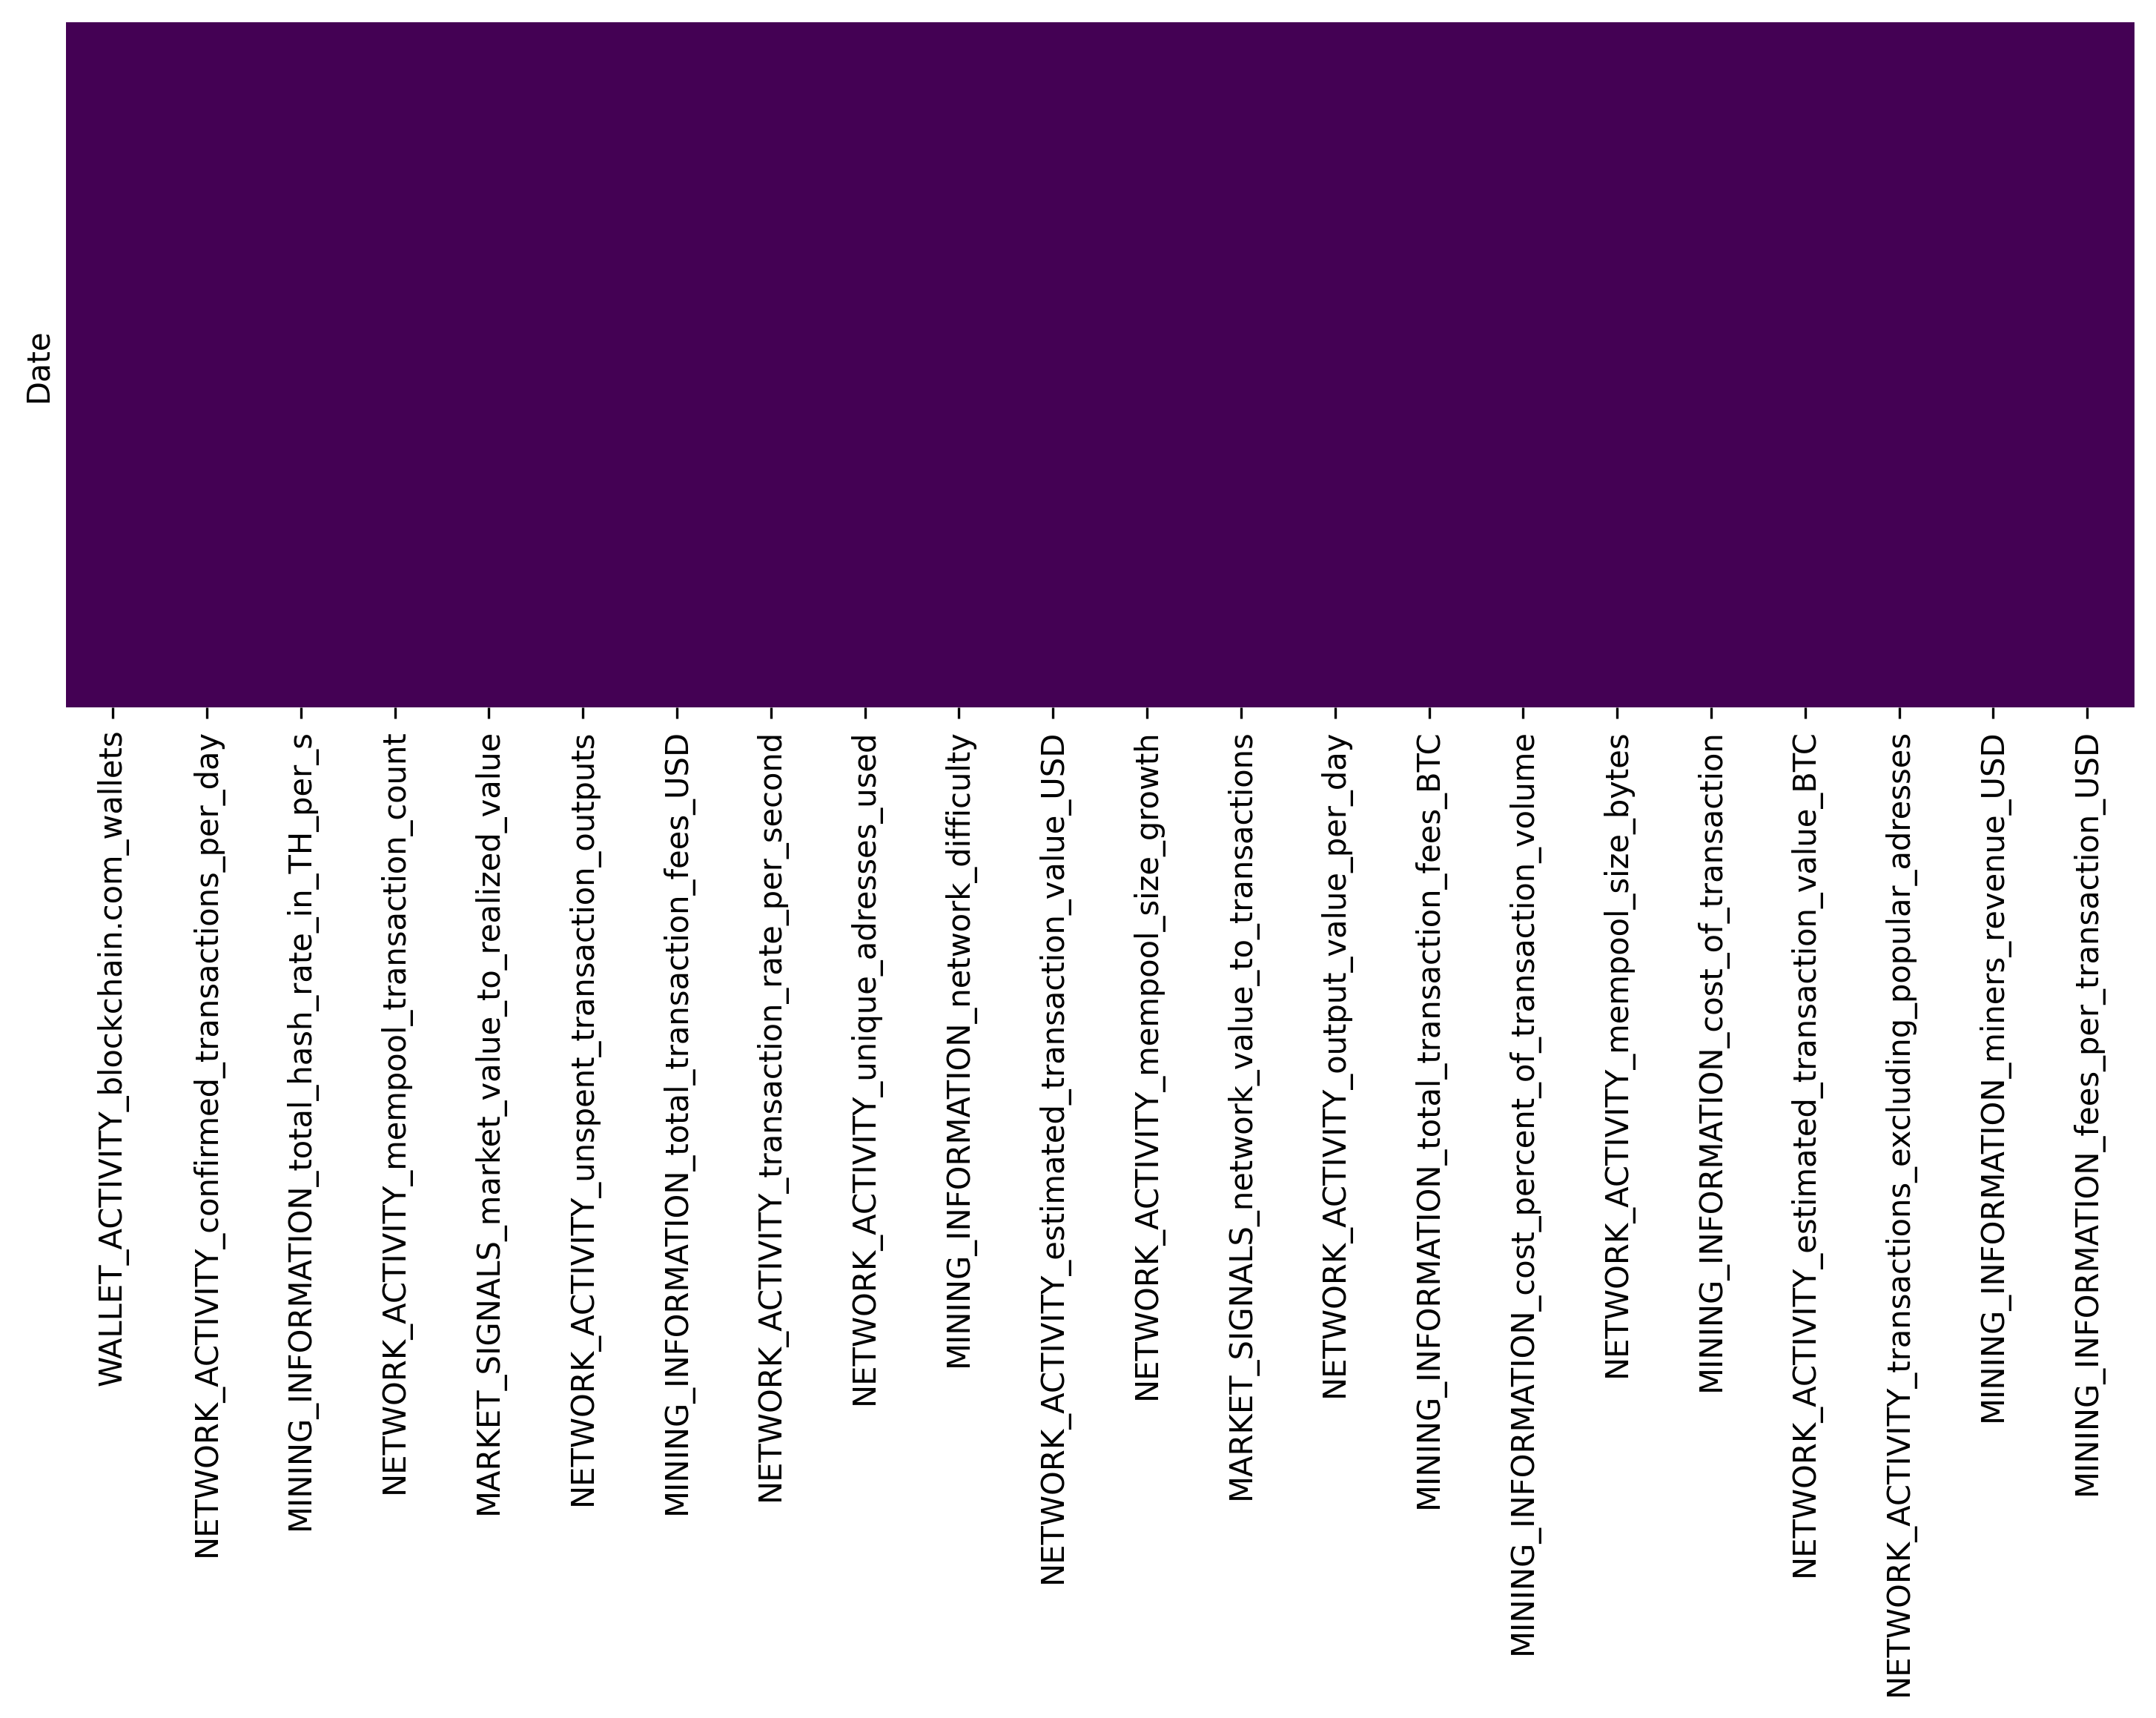

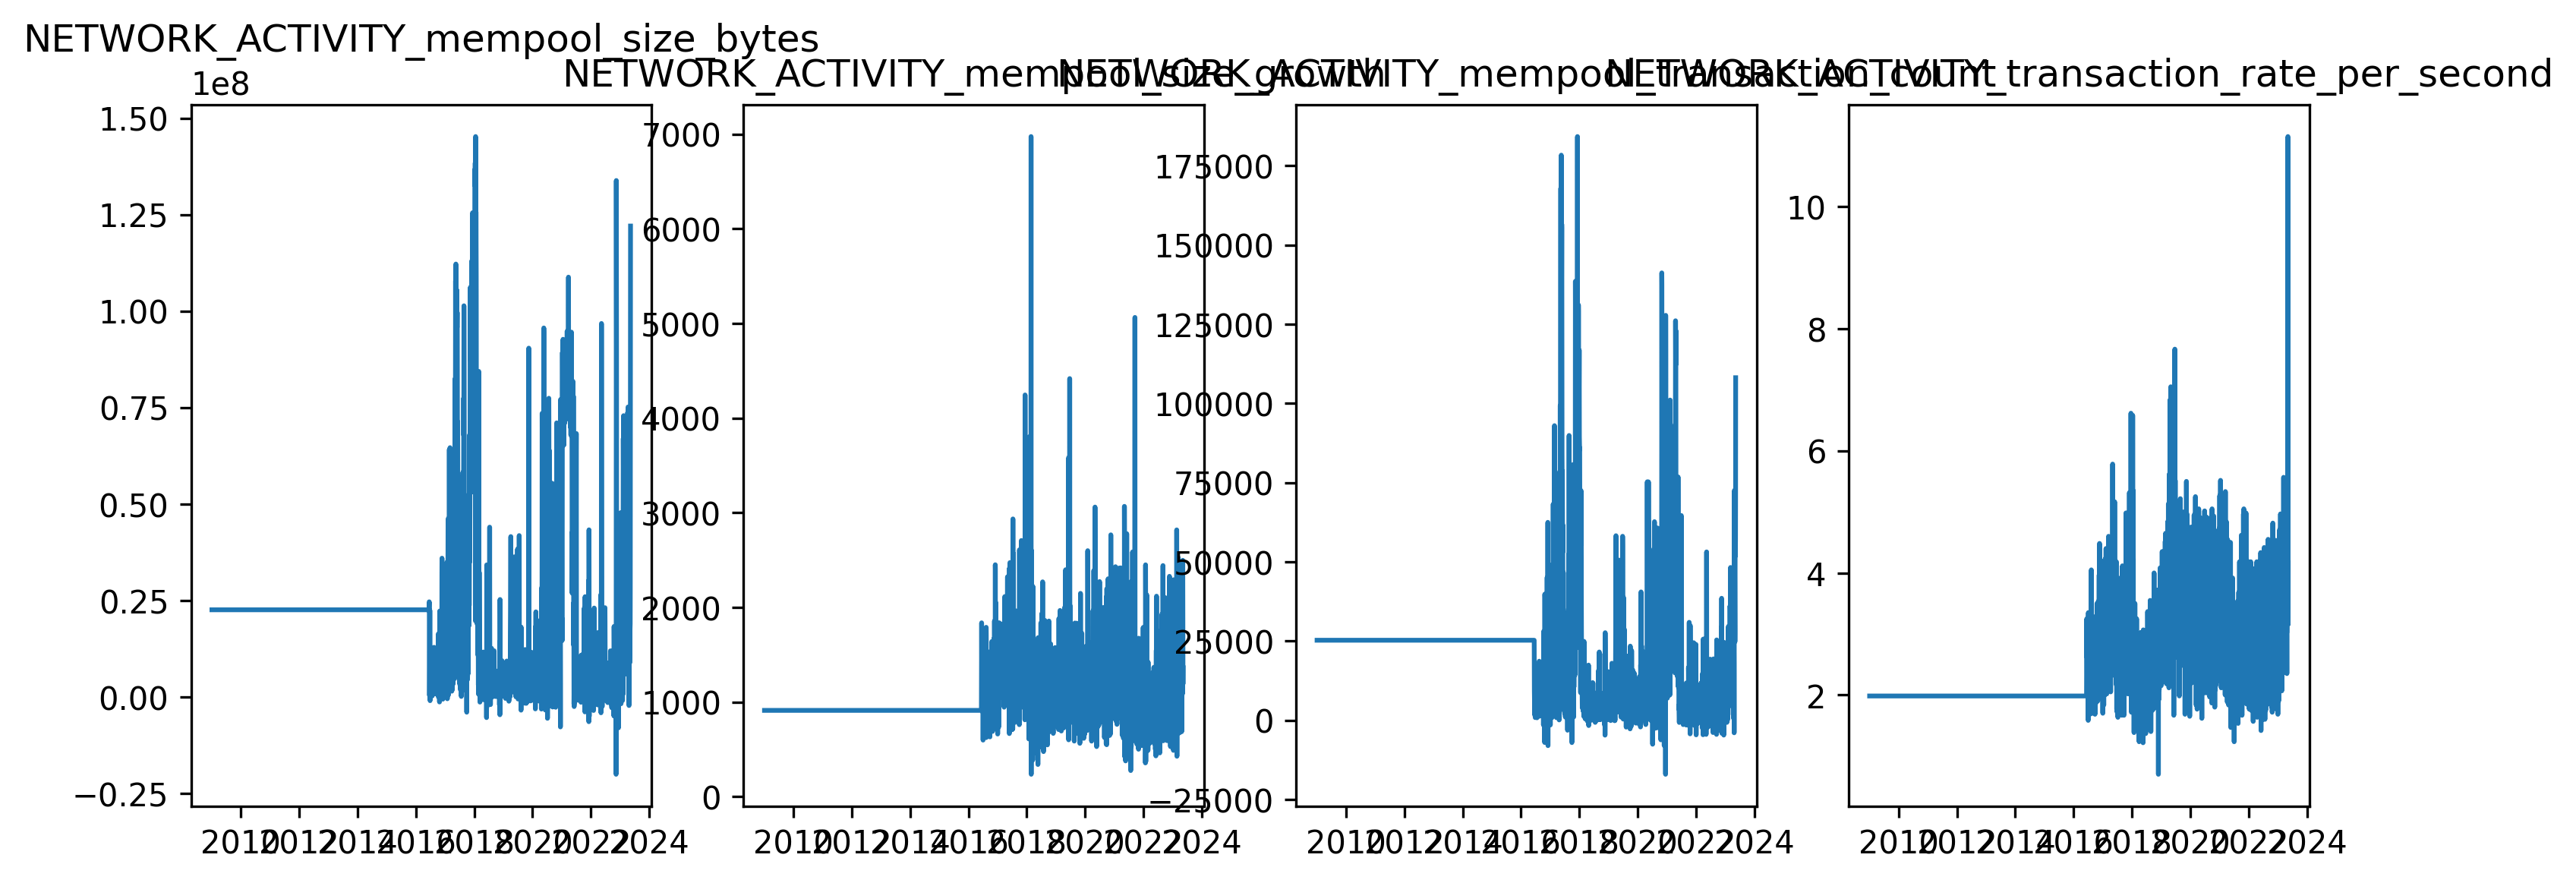

In [ ]:

#address missing data¶
num_missing = df_merged.isnull().sum()
print(num_missing[num_missing >0])

# Find out where does the missing data lies by heatmap plot.
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4),dpi=300)
sns.heatmap(df_merged.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Go through those columns with missing data
fig, axes = plt.subplots(1, 4, figsize=(12, 4),dpi=300)
axes[0].plot(df_merged['NETWORK_ACTIVITY_mempool_size_bytes'])
axes[0].set_title("NETWORK_ACTIVITY_mempool_size_bytes")
axes[1].plot(df_merged['NETWORK_ACTIVITY_mempool_size_growth'])
axes[1].set_title("NETWORK_ACTIVITY_mempool_size_growth")
axes[2].plot(df_merged['NETWORK_ACTIVITY_mempool_transaction_count'])
axes[2].set_title("NETWORK_ACTIVITY_mempool_transaction_count")
axes[3].plot(df_merged['NETWORK_ACTIVITY_transaction_rate_per_second'])
axes[3].set_title("NETWORK_ACTIVITY_transaction_rate_per_second")
# axes[4].plot(df_merged['MINING_INFORMATION_network_difficulty'])
# axes[4].set_title("NETWORK_ACTIVITY_transaction_rate_per_second")
# axes[5].plot(df_merged['MINING_INFORMATION_total_hash_rate_in_TH_per_s'])
# axes[5].set_title("NETWORK_ACTIVITY_transaction_rate_per_second")
# axes[6].plot(df_merged['NETWORK_ACTIVITY_transaction_rate_per_second'])
# axes[6].set_title("NETWORK_ACTIVITY_transaction_rate_per_second")

# According to the plots, 'fillna' with the method of 'bfill' would be fine.
df_merged = df_merged.fillna(method='bfill')
df_merged = df_merged.fillna(method='ffill')


#Check now if any data is still missing
num_missing = df_merged.isnull().sum()
print(num_missing[num_missing >0])


In [ ]:
#Check now if any data is still missing
num_missing = df_merged.isnull().sum()
print(num_missing[num_missing >0])

Series([], dtype: int64)


In [ ]:
filename = "merged_blockchain_data.csv" 
df_merged.to_csv(filename)



In [ ]:
import pandas as pd

source_file = '/content/BTC_data/source_folder/Bitcoin_all_intervals_14_11_2023.csv'
df_merged_btc = pd.read_csv(source_file, header=0, index_col=0)

# Print the shape of each column
for col in df_merged_btc.columns:
    print(f"{col}: {df_merged_btc[col].shape}")

print("")
print("Column Names")
df_merged_btc.columns
print("index",df_merged_btc.index)


CNY_USD_data_Close: (3998,)
EUR_USD_data_Close: (3998,)
GBP_USD_data_Close: (3998,)
RUB_USD_data_Close: (3998,)
SP500_Close: (3998,)
NASDAQ_Close: (3998,)
Gold_Close: (3998,)
WTI_crudeoil_data_Close: (3998,)
Dow_Jones30_Close: (3998,)
google_trends: (3998,)
Tweets: (3998,)
US_10Y_Treasury_rate_Close: (3998,)
US_Initial_Claims_Close: (3998,)
MARKET_SIGNALS_market_value_to_realized_value: (3998,)
MARKET_SIGNALS_network_value_to_transactions: (3998,)
MINING_INFORMATION_cost_of_transaction: (3998,)
MINING_INFORMATION_cost_percent_of_transaction_volume: (3998,)
MINING_INFORMATION_fees_per_transaction_USD: (3998,)
MINING_INFORMATION_miners_revenue_USD: (3998,)
MINING_INFORMATION_network_difficulty: (3998,)
MINING_INFORMATION_total_hash_rate_in_TH_per_s: (3998,)
MINING_INFORMATION_total_transaction_fees_BTC: (3998,)
MINING_INFORMATION_total_transaction_fees_USD: (3998,)
NETWORK_ACTIVITY_confirmed_transactions_per_day: (3998,)
NETWORK_ACTIVITY_estimated_transaction_value_BTC: (3998,)
NETWORK_A

In [ ]:

def cubic_spline_interpolation(df):
    df.drop_duplicates(subset=None, keep='first', inplace=True)
    df.index = pd.to_datetime(df.index) #Convert index to datetime
    df = df.resample("D").interpolate(method='spline', order=2)
    df = df.reset_index()
    
    return df

df_merged_btc = cubic_spline_interpolation(df_merged_btc)


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [ ]:
# Print the shape of each column
for col in df_merged_btc.columns:
    print(f"{col}: {df_merged_btc[col].shape}")

print("")
print("Column Names")
df_merged_btc.columns
print("index",df_merged_btc.index)

Date: (4150,)
CNY_USD_data_Close: (4150,)
EUR_USD_data_Close: (4150,)
GBP_USD_data_Close: (4150,)
RUB_USD_data_Close: (4150,)
SP500_Close: (4150,)
NASDAQ_Close: (4150,)
Gold_Close: (4150,)
WTI_crudeoil_data_Close: (4150,)
Dow_Jones30_Close: (4150,)
google_trends: (4150,)
Tweets: (4150,)
US_10Y_Treasury_rate_Close: (4150,)
US_Initial_Claims_Close: (4150,)
MARKET_SIGNALS_market_value_to_realized_value: (4150,)
MARKET_SIGNALS_network_value_to_transactions: (4150,)
MINING_INFORMATION_cost_of_transaction: (4150,)
MINING_INFORMATION_cost_percent_of_transaction_volume: (4150,)
MINING_INFORMATION_fees_per_transaction_USD: (4150,)
MINING_INFORMATION_miners_revenue_USD: (4150,)
MINING_INFORMATION_network_difficulty: (4150,)
MINING_INFORMATION_total_hash_rate_in_TH_per_s: (4150,)
MINING_INFORMATION_total_transaction_fees_BTC: (4150,)
MINING_INFORMATION_total_transaction_fees_USD: (4150,)
NETWORK_ACTIVITY_confirmed_transactions_per_day: (4150,)
NETWORK_ACTIVITY_estimated_transaction_value_BTC: (41

In [ ]:
df_merged_btc.to_csv("df_merged_btc.csv")

In [ ]:


import pandas as pd

# Load the source CSV file
df = pd.read_csv('/content/Blockchain_data.csv')

# Specify the desired column order
column_order = ['Date', 'MARKET_SIGNALS_market_value_to_realized_value', 'MARKET_SIGNALS_network_value_to_transactions', 'MINING_INFORMATION_cost_of_transaction', 'MINING_INFORMATION_cost_percent_of_transaction_volume', 'MINING_INFORMATION_fees_per_transaction_USD', 'MINING_INFORMATION_miners_revenue_USD', 'MINING_INFORMATION_network_difficulty', 'MINING_INFORMATION_total_hash_rate_in_TH_per_s', 'MINING_INFORMATION_total_transaction_fees_BTC', 'MINING_INFORMATION_total_transaction_fees_USD', 'NETWORK_ACTIVITY_confirmed_transactions_per_day', 'NETWORK_ACTIVITY_estimated_transaction_value_BTC', 'NETWORK_ACTIVITY_estimated_transaction_value_USD', 'NETWORK_ACTIVITY_output_value_per_day', 'NETWORK_ACTIVITY_transactions_excluding_popular_adresses', 'NETWORK_ACTIVITY_unique_adresses_used', 'NETWORK_ACTIVITY_unspent_transaction_outputs', 'WALLET_ACTIVITY_blockchain.com_wallets']

# Reorder the columns
df = df[column_order]

# Save the reordered CSV file
df.to_csv('Blockchain_data_reordered.csv', index=False)


In [ ]:
import pandas as pd

source_file="/content/df_merged_btc.csv"
df_merged_btc = pd.read_csv(source_file, header=0, index_col=0)

# Print the shape of each column
for col in df_merged_btc.columns:
    print(f"{col}: {df_merged_btc[col].shape}")

print("")
print("Column Names")
df_merged_btc.columns
print("index",df_merged_btc.index)

CNY_USD_data_Close: (4150,)
EUR_USD_data_Close: (4150,)
GBP_USD_data_Close: (4150,)
RUB_USD_data_Close: (4150,)
SP500_Close: (4150,)
NASDAQ_Close: (4150,)
Gold_Close: (4150,)
WTI_crudeoil_data_Close: (4150,)
Dow_Jones30_Close: (4150,)
google_trends: (4150,)
Tweets: (4150,)
US_10Y_Treasury_rate_Close: (4150,)
US_Initial_Claims_Close: (4150,)
MARKET_SIGNALS_market_value_to_realized_value: (4150,)
MARKET_SIGNALS_network_value_to_transactions: (4150,)
MINING_INFORMATION_cost_of_transaction: (4150,)
MINING_INFORMATION_cost_percent_of_transaction_volume: (4150,)
MINING_INFORMATION_fees_per_transaction_USD: (4150,)
MINING_INFORMATION_miners_revenue_USD: (4150,)
MINING_INFORMATION_network_difficulty: (4150,)
MINING_INFORMATION_total_hash_rate_in_TH_per_s: (4150,)
MINING_INFORMATION_total_transaction_fees_BTC: (4150,)
MINING_INFORMATION_total_transaction_fees_USD: (4150,)
NETWORK_ACTIVITY_confirmed_transactions_per_day: (4150,)
NETWORK_ACTIVITY_estimated_transaction_value_BTC: (4150,)
NETWORK_A

In [ ]:
df_merged_btc

,CNY_USD_data_Close,EUR_USD_data_Close,GBP_USD_data_Close,RUB_USD_data_Close,SP500_Close,NASDAQ_Close,Gold_Close,WTI_crudeoil_data_Close,Dow_Jones30_Close,google_trends,...,MINING_INFORMATION_total_transaction_fees_USD,NETWORK_ACTIVITY_confirmed_transactions_per_day,NETWORK_ACTIVITY_estimated_transaction_value_BTC,NETWORK_ACTIVITY_estimated_transaction_value_USD,NETWORK_ACTIVITY_output_value_per_day,NETWORK_ACTIVITY_transactions_excluding_popular_adresses,NETWORK_ACTIVITY_unique_adresses_used,NETWORK_ACTIVITY_unspent_transaction_outputs,WALLET_ACTIVITY_blockchain.com_wallets,df_BTCdata_Close
Date,,,,,,,,,,,,,,,,,,,,,
01-Jan-12,0.155568,1.320117,1.579524,0.031333,1219.967963,2622.300917,1630.778387,99.929843,12252.88000,0.25,...,6.104771e+02,-8883.42421,201609.04830,1.016110e+06,251143.1308,-8456.32019,8.531000e+03,1.267800e+06,4.671077e+02,5.300000e+00
02-Jan-12,0.158900,1.292900,1.550300,0.031100,1236.361172,2641.820816,1627.431559,100.455809,12342.53038,0.26,...,3.598932e+01,5410.00000,192201.91320,9.858190e+05,232048.5469,-8243.76801,8.223950e+03,1.267378e+06,4.905803e+02,5.200000e+00
03-Jan-12,0.158900,1.305100,1.564700,0.031600,1277.060000,2648.700000,1599.700000,102.960000,12397.38000,0.23,...,-5.376012e+02,19841.33312,164532.70410,8.505590e+05,270742.9720,5773.00000,8.560557e+03,1.266113e+06,5.146046e+02,4.900000e+00
04-Jan-12,0.158900,1.294200,1.561600,0.031400,1277.300000,2648.400000,1611.900000,103.220000,12418.42000,0.31,...,-5.355534e+02,20368.56254,139580.30540,7.495462e+05,376808.5030,19817.16758,9.542000e+03,1.265012e+06,5.391805e+02,5.600000e+00
05-Jan-12,0.158700,1.278000,1.548400,0.031200,1281.060000,2669.900000,1619.400000,101.810000,12415.70000,0.33,...,4.469720e+01,6994.00000,120841.65200,7.059834e+05,530451.7133,20106.94870,1.044964e+04,1.264241e+06,5.643081e+02,6.900000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-May-23,0.144700,0.999500,1.170700,0.016584,NaN,12588.290000,2033.200000,73.160000,NaN,19.00,...,2.134175e+07,611797.95210,66889.16433,1.877545e+09,800540.6964,574843.00000,-1.098015e+05,9.428124e+07,8.661441e+07,3.433708e+10
09-May-23,0.144500,1.059600,1.194100,0.013286,NaN,12567.150000,2042.900000,73.710000,NaN,18.43,...,2.059393e+07,633059.61870,82628.11813,2.281078e+09,805089.7656,901963.63480,5.865190e+05,9.487687e+07,8.661948e+07,3.446240e+10
10-May-23,0.144200,0.992600,1.151300,0.016591,NaN,11861.380000,2037.100000,72.560000,NaN,NaN,...,9.436638e+06,671668.00000,96648.27002,2.630937e+09,823138.7219,892407.96830,1.288580e+06,9.535761e+07,8.662318e+07,3.458794e+10


In [ ]:

def cubic_spline_interpolation(df):
    df.drop_duplicates(subset=None, keep='first', inplace=True)
    df.index = pd.to_datetime(df.index) #Convert index to datetime
    df = df.resample("D").interpolate(method='spline', order=2)
    df = df.reset_index()
    
    return df

df_merged_btc = cubic_spline_interpolation(df_merged_btc)
df_merged_btc

,Date,CNY_USD_data_Close,EUR_USD_data_Close,GBP_USD_data_Close,RUB_USD_data_Close,SP500_Close,NASDAQ_Close,Gold_Close,WTI_crudeoil_data_Close,Dow_Jones30_Close,...,MINING_INFORMATION_total_transaction_fees_USD,NETWORK_ACTIVITY_confirmed_transactions_per_day,NETWORK_ACTIVITY_estimated_transaction_value_BTC,NETWORK_ACTIVITY_estimated_transaction_value_USD,NETWORK_ACTIVITY_output_value_per_day,NETWORK_ACTIVITY_transactions_excluding_popular_adresses,NETWORK_ACTIVITY_unique_adresses_used,NETWORK_ACTIVITY_unspent_transaction_outputs,WALLET_ACTIVITY_blockchain.com_wallets,df_BTCdata_Close
0,2012-01-01,0.155568,1.320117,1.579524,0.031333,1219.967963,2622.300917,1630.778387,99.929843,12252.880000,...,6.104771e+02,-8883.42421,201609.04830,1.016110e+06,251143.1308,-8456.32019,8.531000e+03,1.267800e+06,4.671077e+02,5.300000e+00
1,2012-01-02,0.158900,1.292900,1.550300,0.031100,1236.361172,2641.820816,1627.431559,100.455809,12342.530380,...,3.598932e+01,5410.00000,192201.91320,9.858190e+05,232048.5469,-8243.76801,8.223950e+03,1.267378e+06,4.905803e+02,5.200000e+00
2,2012-01-03,0.158900,1.305100,1.564700,0.031600,1277.060000,2648.700000,1599.700000,102.960000,12397.380000,...,-5.376012e+02,19841.33312,164532.70410,8.505590e+05,270742.9720,5773.00000,8.560557e+03,1.266113e+06,5.146046e+02,4.900000e+00
3,2012-01-04,0.158900,1.294200,1.561600,0.031400,1277.300000,2648.400000,1611.900000,103.220000,12418.420000,...,-5.355534e+02,20368.56254,139580.30540,7.495462e+05,376808.5030,19817.16758,9.542000e+03,1.265012e+06,5.391805e+02,5.600000e+00
4,2012-01-05,0.158700,1.278000,1.548400,0.031200,1281.060000,2669.900000,1619.400000,101.810000,12415.700000,...,4.469720e+01,6994.00000,120841.65200,7.059834e+05,530451.7133,20106.94870,1.044964e+04,1.264241e+06,5.643081e+02,6.900000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,2023-05-08,0.144700,0.999500,1.170700,0.016584,-82731.499494,12588.290000,2033.200000,73.160000,-583109.685192,...,2.134175e+07,611797.95210,66889.16433,1.877545e+09,800540.6964,574843.00000,-1.098015e+05,9.428124e+07,8.661441e+07,3.433708e+10
4146,2023-05-09,0.144500,1.059600,1.194100,0.013286,-92943.398649,12567.150000,2042.900000,73.710000,-655619.125014,...,2.059393e+07,633059.61870,82628.11813,2.281078e+09,805089.7656,901963.63480,5.865190e+05,9.487687e+07,8.661948e+07,3.446240e+10
4147,2023-05-10,0.144200,0.992600,1.151300,0.016591,-103722.269595,11861.380000,2037.100000,72.560000,-732156.343737,...,9.436638e+06,671668.00000,96648.27002,2.630937e+09,823138.7219,892407.96830,1.288580e+06,9.535761e+07,8.662318e+07,3.458794e+10
4148,2023-05-11,0.143900,1.060700,1.206200,0.013155,-115068.112333,12519.880000,2020.500000,70.870000,-812721.341359,...,9.436638e+06,671668.00000,108949.88810,2.927121e+09,854687.5778,546176.00000,1.294720e+06,9.572346e+07,8.663124e+07,3.471372e+10


In [ ]:
df_merged_btc.fillna(method='ffill')
df_merged_btc = df_merged_btc.fillna(method='bfill')
df_merged_btc = df_merged_btc.fillna(method='ffill')

df_merged_btc.bfill(axis ='rows')
df_merged_btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4150 entries, 01-Jan-12 to 12-May-23
Data columns (total 32 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   CNY_USD_data_Close                                        4150 non-null   float64
 1   EUR_USD_data_Close                                        4150 non-null   float64
 2   GBP_USD_data_Close                                        4150 non-null   float64
 3   RUB_USD_data_Close                                        4150 non-null   float64
 4   SP500_Close                                               4150 non-null   float64
 5   NASDAQ_Close                                              4150 non-null   float64
 6   Gold_Close                                                4150 non-null   float64
 7   WTI_crudeoil_data_Close                                   4150 non-null   float64
 8   Dow_Jones3

In [ ]:
df_merged_btc.to_csv("df_merged_btc_interpolated_csv.csv")
df_merged_btc

,CNY_USD_data_Close,EUR_USD_data_Close,GBP_USD_data_Close,RUB_USD_data_Close,SP500_Close,NASDAQ_Close,Gold_Close,WTI_crudeoil_data_Close,Dow_Jones30_Close,google_trends,...,MINING_INFORMATION_total_transaction_fees_USD,NETWORK_ACTIVITY_confirmed_transactions_per_day,NETWORK_ACTIVITY_estimated_transaction_value_BTC,NETWORK_ACTIVITY_estimated_transaction_value_USD,NETWORK_ACTIVITY_output_value_per_day,NETWORK_ACTIVITY_transactions_excluding_popular_adresses,NETWORK_ACTIVITY_unique_adresses_used,NETWORK_ACTIVITY_unspent_transaction_outputs,WALLET_ACTIVITY_blockchain.com_wallets,df_BTCdata_Close
Date,,,,,,,,,,,,,,,,,,,,,
01-Jan-12,0.155568,1.320117,1.579524,0.031333,1219.967963,2622.300917,1630.778387,99.929843,12252.88000,0.25,...,6.104771e+02,-8883.42421,201609.04830,1.016110e+06,251143.1308,-8456.32019,8.531000e+03,1.267800e+06,4.671077e+02,5.300000e+00
02-Jan-12,0.158900,1.292900,1.550300,0.031100,1236.361172,2641.820816,1627.431559,100.455809,12342.53038,0.26,...,3.598932e+01,5410.00000,192201.91320,9.858190e+05,232048.5469,-8243.76801,8.223950e+03,1.267378e+06,4.905803e+02,5.200000e+00
03-Jan-12,0.158900,1.305100,1.564700,0.031600,1277.060000,2648.700000,1599.700000,102.960000,12397.38000,0.23,...,-5.376012e+02,19841.33312,164532.70410,8.505590e+05,270742.9720,5773.00000,8.560557e+03,1.266113e+06,5.146046e+02,4.900000e+00
04-Jan-12,0.158900,1.294200,1.561600,0.031400,1277.300000,2648.400000,1611.900000,103.220000,12418.42000,0.31,...,-5.355534e+02,20368.56254,139580.30540,7.495462e+05,376808.5030,19817.16758,9.542000e+03,1.265012e+06,5.391805e+02,5.600000e+00
05-Jan-12,0.158700,1.278000,1.548400,0.031200,1281.060000,2669.900000,1619.400000,101.810000,12415.70000,0.33,...,4.469720e+01,6994.00000,120841.65200,7.059834e+05,530451.7133,20106.94870,1.044964e+04,1.264241e+06,5.643081e+02,6.900000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-May-23,0.144700,0.999500,1.170700,0.016584,4124.080000,12588.290000,2033.200000,73.160000,33300.62000,19.00,...,2.134175e+07,611797.95210,66889.16433,1.877545e+09,800540.6964,574843.00000,-1.098015e+05,9.428124e+07,8.661441e+07,3.433708e+10
09-May-23,0.144500,1.059600,1.194100,0.013286,4124.080000,12567.150000,2042.900000,73.710000,33300.62000,18.43,...,2.059393e+07,633059.61870,82628.11813,2.281078e+09,805089.7656,901963.63480,5.865190e+05,9.487687e+07,8.661948e+07,3.446240e+10
10-May-23,0.144200,0.992600,1.151300,0.016591,4124.080000,11861.380000,2037.100000,72.560000,33300.62000,18.43,...,9.436638e+06,671668.00000,96648.27002,2.630937e+09,823138.7219,892407.96830,1.288580e+06,9.535761e+07,8.662318e+07,3.458794e+10


In [ ]:
import yfinance as yahooFinance

GetFacebookInformation = yahooFinance.Ticker("BTC-USD")
df1 = GetFacebookInformation.history(period="max")

df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-09 00:00:00+00:00,27695.068359,27821.400391,27375.601562,27658.775391,14128593256,0.0,0.0
2023-05-10 00:00:00+00:00,27654.636719,28322.687500,26883.669922,27621.755859,20656025026,0.0,0.0
2023-05-11 00:00:00+00:00,27621.085938,27621.941406,26781.826172,27000.789062,16724343943,0.0,0.0


In [ ]:
# Add all technical indicators derived from the close price
from ta import add_all_ta_features
df_merged_btc_TA = add_all_ta_features(df1, close='Close',open='Open',high='High',volume='Volume',low='Low', fillna=True)

# Save the updated DataFrame with technical indicators
df_merged_btc_TA

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,-7.924336e+06,21056800,-0.376331,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457.334015,-96.577286,0.000000,0.000000
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,-2.454020e+07,-13426400,-0.441847,...,-0.576839,-0.115368,-0.461471,4.857081,0.971416,3.885665,439.877756,-7.192558,-7.464335,-7.192558
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,-4.448391e+07,-51346100,-0.475969,...,-1.557290,-0.403752,-1.153538,9.351817,2.647496,6.704321,416.891269,-6.984265,-7.240151,-13.674475
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,-3.937687e+07,-14482500,-0.302148,...,-2.067514,-0.736505,-1.331009,12.071627,4.532323,7.539305,412.942142,3.573492,3.511124,-10.589639
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,-5.037763e+07,-41062600,-0.321074,...,-2.636293,-1.116462,-1.519831,10.907564,5.807371,5.100193,406.300170,-2.465854,-2.496766,-12.794369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 00:00:00+00:00,27695.068359,27821.400391,27375.601562,27658.775391,14128593256,0.0,0.0,4.221606e+12,1166311352599,-0.028277,...,-0.158473,0.417387,-0.575860,-5.846167,-4.419075,-1.427092,28675.218707,-0.128178,-0.128261,5947.828172
2023-05-10 00:00:00+00:00,27654.636719,28322.687500,26883.669922,27621.755859,20656025026,0.0,0.0,4.222140e+12,1145655327573,0.009369,...,-0.394834,0.254943,-0.649777,-3.475696,-4.230399,0.754703,28598.983180,-0.133844,-0.133933,5939.733534
2023-05-11 00:00:00+00:00,27621.085938,27621.941406,26781.826172,27000.789062,16724343943,0.0,0.0,4.214133e+12,1128930983630,0.035938,...,-0.752032,0.053548,-0.805580,-3.419696,-4.068259,0.648563,28523.384980,-2.248108,-2.273763,5803.953824


In [ ]:
df_merged_btc_TA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3161 entries, 2014-09-17 00:00:00+00:00 to 2023-05-13 00:00:00+00:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       3161 non-null   float64
 1   High                       3161 non-null   float64
 2   Low                        3161 non-null   float64
 3   Close                      3161 non-null   float64
 4   Volume                     3161 non-null   int64  
 5   Dividends                  3161 non-null   float64
 6   Stock Splits               3161 non-null   float64
 7   volume_adi                 3161 non-null   float64
 8   volume_obv                 3161 non-null   int64  
 9   volume_cmf                 3161 non-null   float64
 10  volume_fi                  3161 non-null   float64
 11  volume_em                  3161 non-null   float64
 12  volume_sma_em              3161 non-null   float64
 13  

In [ ]:
df_merged_btc_TA.to_csv("df_BTC_technical_indicators.csv")

In [ ]:
import pandas as pd

df_technical_indicators = pd.read_csv('/content/df_BTC_technical_indicators.csv')
df_fundamental_indicators = pd.read_csv('/content/df_BTC_fundamental_indicators.csv')
print("Technical indicators")
print(df_technical_indicators.info())
print("")
print("Fundamental indicators")
print(df_fundamental_indicators.info())


Technical indicators
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3161 entries, 0 to 3160
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3161 non-null   object 
 1   Open                       3161 non-null   float64
 2   High                       3161 non-null   float64
 3   Low                        3161 non-null   float64
 4   Close                      3161 non-null   float64
 5   Volume                     3161 non-null   float64
 6   volume_adi                 3161 non-null   float64
 7   volume_obv                 3161 non-null   float64
 8   volume_cmf                 3161 non-null   float64
 9   volume_fi                  3161 non-null   float64
 10  volume_em                  3161 non-null   float64
 11  volume_sma_em              3161 non-null   float64
 12  volume_vpt                 3161 non-null   float64
 13  volume_vwap                

In [ ]:
# Convert the Date columns in both DataFrames to datetime64[ns, UTC]
df_technical_indicators['Date'] = pd.to_datetime(df_technical_indicators['Date'], utc=True)
df_fundamental_indicators['Date'] = pd.to_datetime(df_fundamental_indicators['Date'], utc=True)

# Merge the DataFrames on the Date column
df_merged = df_technical_indicators.merge(df_fundamental_indicators, on='Date', how='inner')


In [ ]:
print(len(df_technical_indicators.columns))
print(len(df_fundamental_indicators.columns))

89
33


In [ ]:
df_merged.to_csv("df_technical_fundamental.csv")

In [ ]:
df_merged.describe().transform()

TypeError: ignored